<a href="https://colab.research.google.com/github/hashmil/AI-colab-notebooks/blob/main/AI_Music_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install music21
import glob
import pickle
import numpy as np
from music21 import converter, instrument, note, chord
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Activation, BatchNormalization as BatchNorm
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# from pathlib import Path
# import numpy
# #import np_utils

# # Reads the files and folders within the MIDI folder
# # and stores the names in the list
# songs = []
# folder = Path('/content/drive/MyDrive/MIDI/MIDI/')
# for file in folder.rglob('*.mid'):
#   songs.append(file)

from pathlib import Path

# Make sure to mount Google Drive before running this cell
folder = Path('/content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles')
songs = []

# Iterating over each .mid file in the folder
for file in folder.rglob('*.mid'):
    songs.append(file)

# Optional: Add a check if no songs were found
if not songs:
    print("No MIDI files found in the specified directory.")


In [6]:
print(f'Number of songs in the dataset: {len(songs)}')

Number of songs in the dataset: 5337


In [7]:
# Get a sample of the vast list of songs

import random
result =  random.sample([x for x in songs], 1000)

In [8]:
# Convert the files from .mid to a list of all the notes.

from music21 import converter, instrument, note, chord
notes = []
for i,file in enumerate(result):
    print(f'{i+1}: {file}')
    try:
      midi = converter.parse(file)
      notes_to_parse = None
      parts = instrument.partitionByInstrument(midi)
      if parts: # file has instrument parts
          notes_to_parse = parts.parts[0].recurse()
      else: # file has notes in a flat structure
          notes_to_parse = midi.flat.notes
      for element in notes_to_parse:
          if isinstance(element, note.Note):
              notes.append(str(element.pitch))
          elif isinstance(element, chord.Chord):
              notes.append('.'.join(str(n) for n in element.normalOrder))
    except:
      print(f'FAILED: {i+1}: {file}')

1: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Giorni_infiniti.mid
2: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Misunderstanding.1.mid
3: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Twilight_Time.mid
4: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Hi_Ho_Silver_Lining.mid
5: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Eraser.1.mid
6: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Cant_Stand_Losing_You.4.mid
7: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Take_My_Breath_Away.mid
8: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/I_Cant_Dance.2.mid
9: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Everybodys_Somebodys_Fool.mid
10: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Your_Blue_Room.1.mid
11: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Moon_Baby.mid
12: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Roses_Are_Red.2.mid

/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=16, channel=None, data=b'Bonham  \xa9 1969'>; getting generic Instrument
  warnings.warn(


93: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Every_Night.mid
94: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Piccola_e_fragile.2.mid
95: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Deine_Spuren_im_Sand.mid
96: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Squeeze_Box.mid
97: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Knockin_on_Heaven_Door.3.mid
98: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Vivere_feat._Andrea_Bocelli_.mid
99: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/When_You_Tell_Me_That_You_Love_Me.mid
100: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Xote_swingado.mid
101: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Piccola_e_fragile.1.mid
102: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Surfin_USA.4.mid
103: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Concertina.mid
104: /content/drive/MyDrive/MIDI/AllMidiFiles-uz

/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'Lene G./Ren\xe9 Dif'>; getting generic Instrument
  warnings.warn(


142: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Cordell.mid


/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=7, channel=None, data=b'Fl\x9ete'>; getting generic Instrument
  warnings.warn(


143: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/How_About_Us.mid
144: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Listen_to_Your_Heart.mid
145: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Bloody_Well_Right.mid
FAILED: 145: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Bloody_Well_Right.mid
146: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Wild_Honey_Pie.mid
147: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Die_Another_Day.mid
148: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Sugar_Baby_Love.mid
149: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Here_Comes_the_Rain_Again.4.mid
150: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Un-Break_My_Heart.1.mid
151: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Kiss_Me_Quick.1.mid
152: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Didnt_We_Almost_Have_It_All.2.mid
153: /content/drive/MyDrive/MIDI/

/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'Te extra\xf1o,te olvido y te amo de nuevo/ Ricky Martin by samuelluis'>; getting generic Instrument
  warnings.warn(


167: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/West_Side_Story_Medley.1.mid
168: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/All_Ive_Ever_Wanted.mid
169: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/La_Bilirrubina.mid
170: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Under_Pressure.6.mid
171: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Cream.1.mid
172: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Nobody_Else_single_remix_.mid
173: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Dove_arriva_quel_cespuglio.mid
174: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Lets_Talk_About_Sex.mid
175: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Smoke_Gets_in_Your_Eyes.3.mid
176: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Ill_Play_for_You.mid
177: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Eleanor_Rigby.10.mid
178: /content/drive/MyDrive/MIDI/A

/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'\xff Sequenced 1999 by'>; getting generic Instrument
  warnings.warn(


263: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Glycerine.mid
264: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Chicago.mid
265: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/As_Tears_Go_By.3.mid
266: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Honesty.4.mid
267: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/All_for_Love.3.mid
268: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Strangers_in_the_Night.mid
269: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/I_Got_You_Babe.mid
270: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Marching_Season.mid
271: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Dont_Bother_Me.1.mid
272: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Good_Golly_Miss_Molly.mid
273: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Wishing_I_Was_There.1.mid
274: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Boombastic.mi

/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'\xff Sequenced 1997 by'>; getting generic Instrument
  warnings.warn(


283: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Farewell_and_End_Title.mid
284: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Elite_Syncopations.mid
285: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Are_You_Ready_to_Fly.mid
286: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Brain_Damage.4.mid
287: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Dont_Let_The_Sun_Go_Down_On_Me.1.mid
288: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Everybodys_Trying_To_Be_My_Baby.1.mid
289: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Just_The_Way_It_Is,_Baby.mid
290: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Le_Mouton_de_Panurge.mid
291: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Dont_Tread_on_Me.mid
292: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Aint_Goin_Down_til_the_Sun_Comes_Up_.1.mid
293: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Acqua.mid

/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=3, channel=None, data=b'M\xe9lodie'>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent INSTRUMENT_NAME, track=3, channel=None, data=b'M\xe9lodie'>; getting generic Instrument
  warnings.warn(


386: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/A_Little_Respect.mid
387: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Hey_Jude.10.mid
388: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Stayin_Alive.5.mid
389: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Dance_Dance_Dance.mid
390: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Stray_Cat_Strut.1.mid
391: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Dont_Stop_Believin.1.mid
392: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/New_York_Mining_Disaster_1941.2.mid
393: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/My_Love_Dont_Cost_a_Thing.mid
394: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Woman_in_Love.4.mid
395: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Dont_Worry_Baby.1.mid
396: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Here_I_Go_Again.mid
397: /content/drive/MyDrive/MIDI/AllMidiFil

/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=13, channel=None, data=b'\xb8 1999 C-S-C'>; getting generic Instrument
  warnings.warn(


441: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Bitter_Tears.mid
442: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Voglio_volare.mid
443: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Shepherd_Moons.mid
444: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/We_Are.mid
445: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Broadway.mid
446: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Di_passaggio.1.mid
447: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/The_Model.mid
448: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Hammer_to_Fall.mid
449: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Tell_Him.3.mid
450: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/War_Pigs.1.mid
451: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Malinconoia.mid
452: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Rollin_Tumblin.mid
453: /content/drive/MyDrive/MIDI/AllM

/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=18, channel=None, data=b'Bodhr\xe0n'>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=19, channel=None, data=b'Bodhr\xe0n (tom)'>; getting generic Instrument
  warnings.warn(


472: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Bad_Moon_Rising.2.mid
473: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Auf_immer_und_ewig.1.mid
474: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Terug_in_de_tijd.mid
475: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Please_Mr._Please.mid
476: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Kiss_the_Rain.mid
477: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Movie_Star.mid
478: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Let_It_Be_Me.1.mid
479: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Crocodile_Rock.mid
480: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Mixed_Emotions.1.mid
481: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Holiday.2.mid
482: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Mmm_Mmm_Mmm.mid
483: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Marguerita_Time.mid


/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=15, channel=None, data=b'Copyright \xa91998'>; getting generic Instrument
  warnings.warn(


546: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Birthday.4.mid
547: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Dedicato_a_te.mid
548: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Non_ce_piu_niente_da_fare.mid
549: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/I_Will.mid
550: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/The_Motown_Song.mid
551: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/I_Just_Called_to_Say_I_Love_You.1.mid
552: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Papa_Dont_Preach.3.mid
553: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Sorvolando_Eilat.mid
554: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Judy_in_Disguise.mid
555: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Il_battito_animale.1.mid
556: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Cloudbusting.2.mid
557: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllM

/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=13, channel=None, data=b'Vorz\x84hle'>; getting generic Instrument
  warnings.warn(


594: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Pride.8.mid
595: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Unplugged_01_All_This_Time.mid
596: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Il_clarinetto.mid
597: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Into_the_Groove.2.mid
598: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Cherry_Bomb.mid
599: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Mercanti_e_servi.mid
600: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Georgy_Porgy.2.mid
601: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/El_Condor_Pasa.mid
602: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Ive_Just_Seen_a_Face.1.mid
603: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Witchy_Woman.3.mid
604: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Sex_on_the_Phone.mid
605: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/A_Woman

/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=13, channel=None, data=b'Copyright \xa91998'>; getting generic Instrument
  warnings.warn(


621: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Im_Alive.mid
622: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/No_One_Can.mid
623: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/So_What.mid
624: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Part-Time_Lover.3.mid
625: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Les_Peanuts_Charly_Brown_Snoopy.mid
626: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Compleanno_di_maggio.mid
627: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Thinking_of_You.mid
628: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Taste.mid
FAILED: 628: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Taste.mid
629: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Not_a_Second_Time.mid
630: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Sela.mid
631: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Maria.1.mid
632: /content/driv

/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'Marlon Brando \xe8 sempre lui'>; getting generic Instrument
  warnings.warn(


641: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Whats_the_New_Mary_Jane.1.mid
642: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/My_Melancholy_Blues.mid
643: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/The_Stranger.1.mid
644: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Ripcord.mid
645: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Forgot_About_Dre.mid
646: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Puoi_Words_.mid
647: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Cat_People.1.mid
648: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Stolen_Moments.mid
649: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Ticket_to_Heaven.mid
650: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/All_You_Need_Is_Love.1.mid
651: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Waltz_In_A_Minor,_Op._34_Nr._2.mid
652: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllM

/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'Bodhr\xe0n'>; getting generic Instrument
  warnings.warn(


745: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Silence_Is_Golden.1.mid
746: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/I_Cant_Dance.mid
747: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Spot.mid
748: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/To_Live_Is_to_Die.mid
749: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Nookie.mid
750: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Everything_to_Everyone.mid
751: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Alba_chiara.mid
752: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Balliamo_balliamo.mid
753: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/One_More_Try.2.mid
754: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Foxy_Lady.1.mid
755: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Antichrist_Superstar.mid
756: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Land_of_Confusion.2.mid


/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'\x83N\x83\x8b\x81[\x83G\x83\x8b\x81E\x83V\x81[/\xbb\xde\xa5\xcd\xde\xdd\xc1\xac\xb0\xbd\xde'>; getting generic Instrument
  warnings.warn(


763: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Leper_Messiah.2.mid
764: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Siamo_Solo_Noi.mid
765: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Das_Boot.1.mid
766: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Romance_Without_Words_in_A-flat_minor,_Op._17_No._3.mid
767: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Imagine.2.mid
768: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Les_casseuses.mid
769: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Freak_Me.mid


/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'Nokio - Copyrighted \xa9'>; getting generic Instrument
  warnings.warn(


770: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Der_Junge_mit_der_Mundharmonika.mid
771: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Get_Down_On_It.mid
772: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/From_Where_I_Am.mid
773: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Copacabana_At_the_Copa_.mid
774: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/De_Do_Do_Do_De_Da_Da_Da.3.mid
775: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Subdivisions.mid
776: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Juke_Box_Jive.1.mid
777: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Where_Does_My_Heart_Beat_Now.mid
778: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Up_in_Arms.1.mid
779: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Its_Now_or_Never.2.mid
780: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Sicilienne.mid
781: /content/drive/MyDrive/MIDI/AllMi

/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'Fl\x84che  '>; getting generic Instrument
  warnings.warn(


783: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Ali_doro.mid
784: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Waltz_from_Faust.mid
785: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Sarabande.mid
786: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Marble_Halls.mid
787: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Wait.1.mid
788: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Under_Pressure.5.mid
789: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Born_to_Be_Alive.3.mid
790: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Elegie_a_un_rat_de_cave_feat._Les_Petits_Francais_.mid
791: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/A_Million_to_One.mid
792: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Blow_Away.mid
793: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Stasera_mi_butto.mid
794: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/L

/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=5, channel=None, data=b'Gilbert Labont\xe9'>; getting generic Instrument
  warnings.warn(


883: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Insensitive.mid
884: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Le_Jazz_Hot.mid
885: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Tu_puoi.mid
886: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/The_River.1.mid
887: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Blackbird.4.mid
888: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Futura.mid
889: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Sacrifice.1.mid
890: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Fatte_na_pizza.mid
891: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/In_Memory_of_Elizabeth_Reed.1.mid
892: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Amore_che_prendi_amore_che_dai.mid
893: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/The_Beautiful_Ones.mid
894: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/We_Will_Rock_You.2

/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=3, channel=None, data=b'Remix\xe9'>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'Remix\xe9'>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=5, channel=None, data=b'Remix\xe9'>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=6, channel=None, data=b'Remix\xe9'>; getting generic 

902: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Father_to_Son.1.mid
903: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Kayama.mid
904: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/I_Cant_Dance.4.mid
905: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Night_Fever.2.mid
906: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Run_for_Your_Life.mid
907: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Im_Your_Boogie_Man.mid
908: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Judys_Turn_to_Cry.mid
909: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/At_the_Zoo.mid
910: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Oh_Carol.mid
911: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Freak.mid
912: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/With_or_Without_You.6.mid
913: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Slavenkoor_Carnavalesque.mid
914:

/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=12, channel=None, data=b'Andreas Lundvall\xb4s'>; getting generic Instrument
  warnings.warn(


987: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/E_poi.2.mid
988: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/I_Should_Have_Known_Better.2.mid
989: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Martha_My_Dear.mid
990: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Love_Games.mid
991: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/The_Beach_Boys_Medley.mid
992: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Wann_wirds_mal_wieder_richtig_Sommer.mid
993: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Air_India.1.mid
994: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Fool_on_the_Hill.mid
995: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Domenica_e_lunedi.mid
996: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Se_stiamo_insieme.2.mid
997: /content/drive/MyDrive/MIDI/AllMidiFiles-uzip/AllMidiFiles/Stop_the_world_vogliamo_tornare_a_giocare_.mid
998: /content/drive/

In [14]:
# Save notes to Drive for future usage
with open('/content/drive/MyDrive/MIDI/notes', 'wb') as filepath:
  pickle.dump(notes, filepath)

In [4]:
# Load notes from Drive
with open('/content/drive/MyDrive/MIDI/notes', 'rb') as filepath:
  notes = pickle.load(filepath)

In [5]:
import numpy as np
from tensorflow.keras.utils import to_categorical


def prepare_sequences(notes, n_vocab):
    """ Prepare the sequences used by the Neural Network """
    sequence_length = 100

    # Get all unique pitchnames
    pitchnames = sorted(set(item for item in notes))

     # Create a dictionary to map pitches to integers
    note_to_int = dict((note, number) for number, note in enumerate(pitchnames))

    network_input = []
    network_output = []

    # create input sequences and the corresponding outputs
    for i in range(0, len(notes) - sequence_length, 1):
        # sequence_in is a sequence_length list containing sequence_length notes
        sequence_in = notes[i:i + sequence_length]
        # sequence_out is the sequence_length + 1 note that comes after all the notes in
        # sequence_in. This is so the model can read sequence_length notes before predicting
        # the next one.
        sequence_out = notes[i + sequence_length]
        # network_input is the same as sequence_in but it containes the indexes from the notes
        # because the model is only fed the indexes.
        network_input.append([note_to_int[char] for char in sequence_in])
        # network_output containes the index of the sequence_out
        network_output.append(note_to_int[sequence_out])

    # n_patters is the length of the times it was iterated
    # for example if i = 3, then n_patterns = 3
    # because network_input is a list of lists
    n_patterns = len(network_input)

    # reshape the input into a format compatible with LSTM layers
    # Reshapes it into a n_patterns by sequence_length matrix
    # network_input = numpy.reshape(network_input, (n_patterns, sequence_length, 1))
    network_input = np.reshape(network_input, (n_patterns, sequence_length, 1))
    # normalize input
    network_input = network_input / float(n_vocab)


    # OneHot encodes the network_output
    # network_output = np_utils.to_categorical(network_output)
    network_output = to_categorical(network_output)

    return (network_input, network_output)

n_vocab = len(set(notes))
network_input, network_output = prepare_sequences(notes,n_vocab)

In [6]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Activation, Flatten, BatchNormalization



def create_network(network_input, n_vocab):
    """ create the structure of the neural network """
    model = Sequential()
    model.add(LSTM(
        512,
        input_shape=(network_input.shape[1], network_input.shape[2]),
        recurrent_dropout=0.3,
        return_sequences=True
    ))
    model.add(LSTM(512, return_sequences=True, recurrent_dropout=0.3,))
    model.add(Flatten())
    model.add(BatchNorm())
    model.add(Dropout(0.3))
    #model.add(Dense(2048))
    model.add(Dense(1024))
    #model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(BatchNorm())
    model.add(Dropout(0.3))
    model.add(Dense(n_vocab))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])

    return model
model = create_network(network_input, n_vocab)

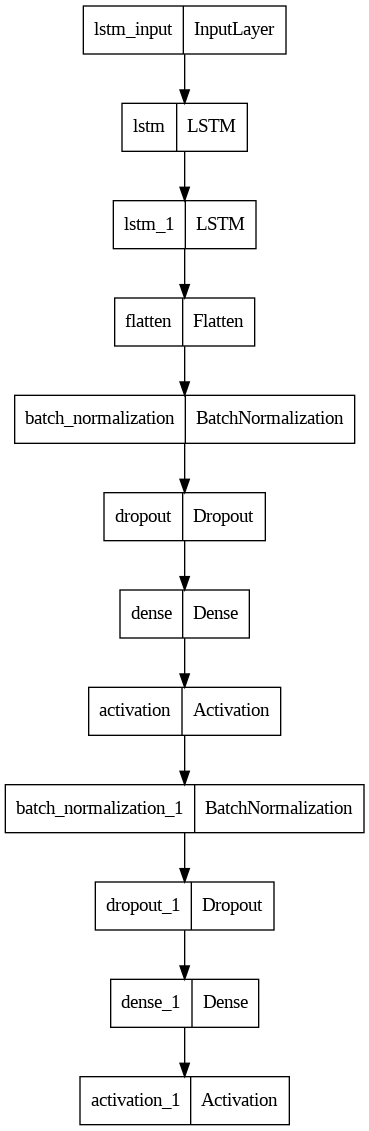

In [7]:
import tensorflow as tf

tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False
)

In [8]:
def train(model, network_input, network_output):
    """ train the neural network """
    filepath = "weights-improvement-{epoch:02d}-{loss:.4f}-bigger.hdf5"
    checkpoint = ModelCheckpoint(
        filepath,
        monitor='loss',
        verbose=0,
        save_best_only=True,
        mode='min'
    )
    callbacks_list = [checkpoint]

    model.fit(network_input, network_output, epochs=5, batch_size=128, callbacks=callbacks_list)

    return model

In [9]:
import numpy as np

def generate_notes(model, network_input, pitchnames, n_vocab):
    """ Generate notes from the neural network based on a sequence of notes """
    # pick a random sequence from the input as a starting point for the prediction
    # Selects a random row from the network_input
    # start = numpy.random.randint(0, len(network_input)-1)
    start = np.random.randint(0, len(network_input)-1)

    int_to_note = dict((number, note) for number, note in enumerate(pitchnames))

    # Random row from network_input
    pattern = network_input[start]
    prediction_output = []

    # generate 500 notes
    for note_index in range(500):
        print(note_index)
        # Reshapes pattern into a vector
        # prediction_input = numpy.reshape(pattern, (1, len(pattern), 1))
        prediction_input = np.reshape(pattern, (1, len(pattern), 1))
        # Standarizes pattern
        prediction_input = prediction_input / float(n_vocab)

        # Predicts the next note
        prediction = model.predict(prediction_input, verbose=0)

        # Outputs a OneHot encoded vector, so this picks the columns
        # with the highest probability
        # index = numpy.argmax(prediction)
        index = np.argmax(prediction)
        # Maps the note to its respective index
        result = int_to_note[index]
        # Appends the note to the prediction_output
        prediction_output.append(result)

        # Adds the predicted note to the pattern
        # pattern = numpy.append(pattern,index)
        pattern = np.append(pattern,index)
        # Slices the array so that it contains the predicted note
        # eliminating the first from the array, so the model can
        # have a sequence
        pattern = pattern[1:len(pattern)]

    return prediction_output

In [10]:
from music21 import instrument, note, stream

def create_midi(prediction_output):
    """ convert the output from the prediction to notes and create a midi file
        from the notes """
    offset = 0
    output_notes = []

    # create note and chord objects based on the values generated by the model
    for pattern in prediction_output:
        # pattern is a chord
        if ('.' in pattern) or pattern.isdigit():
            notes_in_chord = pattern.split('.')
            notes = []
            for current_note in notes_in_chord:
                new_note = note.Note(int(current_note))
                new_note.storedInstrument = instrument.Piano()
                notes.append(new_note)
            new_chord = chord.Chord(notes)
            new_chord.offset = offset
            output_notes.append(new_chord)
        # pattern is a note
        else:
            new_note = note.Note(pattern)
            new_note.offset = offset
            new_note.storedInstrument = instrument.Piano()
            output_notes.append(new_note)

        # increase offset each iteration so that notes do not stack
        offset += 0.5

    midi_stream = stream.Stream(output_notes)

    midi_stream.write('midi', fp='test_output.mid')